<a href="https://colab.research.google.com/github/BossDevinator/IS_4482/blob/main/A4_Moore_Devan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ASSIGNMENT 4: Decision Tree and Naïve Cross-validation
###By: Devan Moore
###9/9/2024

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!cp "/content/drive/MyDrive/Colab Notebooks/A4_Moore_Devan.ipynb" ./
#!jupyter nbconvert --to html "A4_Moore_Devan.ipynb"


#CHUNK 1:
###Set up, Data import, and Preparation

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/matthewpecsok/4482_fall_2024/main/data/CD_additional_modified.csv ')

In [5]:
df = df.drop(['age', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'duration'], axis=1)

In [6]:
y_target = df.pop('y')
y_target = y_target.eq('yes').mul(1)
y_target.head()

,y
0,0
1,0
2,0
3,0
4,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          4117 non-null   object
 1   marital      4117 non-null   object
 2   education    4117 non-null   object
 3   default      4117 non-null   object
 4   housing      4117 non-null   object
 5   loan         4117 non-null   object
 6   contact      4117 non-null   object
 7   month        4117 non-null   object
 8   day_of_week  4117 non-null   object
 9   poutcome     4117 non-null   object
dtypes: object(10)
memory usage: 321.8+ KB


In [8]:
df.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117
unique,12,4,7,2,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,1012,2508,1264,3314,2175,3347,2650,1378,860,3522


In [9]:
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent


In [10]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [15]:
train_x, test_x = train_test_split(df_encoded, train_size=.7, random_state=13)

In [19]:
train_y, test_y = train_test_split(y_target, train_size=.7, random_state=13)

In [20]:
train_y

,y
3092,0
3947,1
3046,0
219,0
135,1
...,...
153,1
866,0
2790,0
74,1


In [21]:
test_y

,y
603,0
1127,0
402,0
3635,0
1669,0
...,...
326,0
3157,0
2354,0
3905,0


In [49]:
whole_df_count = df_encoded.value_counts()
whole_df_percent = (whole_df_count / len(df_encoded) * 100).round(2)

train_y_count = train_y.value_counts()
train_y_percent = (train_y_count / len(train_y) * 100).round(2)

test_y_count = test_y.value_counts()
test_y_percent = (test_y_count / len(test_y) * 100).round(2)


In [50]:
print("Whole Dataset Distribution")
whole_df_percent

Whole Dataset Distribution


job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  marital_unknown  education_basic.4y  education_basic.6y  education_basic.9y  education_high.school  education_professional.course  education_university.degree  education_unknown  default_no  default_unknown  housing_no  housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  contact_cellular  contact_telephone  month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success
True        False            False             False          False           False        False              False         False        False           False           False        False             True             False           False            False               False               False               False                  False                          True                         False              True        False            False       False            True         True     False         False     True              False              False      True       False      False      False      False      False      False      False      False      False            False            False            True             False            False             True                  False               0.24
                                                                                                                                                                                                        False            True            False            False               False               False               False                  False                          True                         False              True        False            False       False            True         True     False         False     True              False              False      True       False      False      False      False      False      False      False      False      False            False            True             False            False            False             True                  False               0.22
                                                                                                                                                                                                        True             False           False            False               False               False               True                   False                          False                        False              True        False            True        False            False        True     False         False     False             True               False      False      False      False      False      False      True       False      False      False      False            False            False            False            True             False             True                  False               0.22
False       False            False             False          False           False        False              False         False        True            False           False        False             True             False           False            False               False               False               False                  True                           False                        False              True        False            True        False            False        True     False         False     False             True               False      False      False      False      False      False      True       False      False      False      False            False            False            True             False            False   

In [56]:
print("\nTrain Set Percentages")
train_y_percent


Train Set Percentages


,count
y,
0,89.03
1,10.97


In [57]:
print("\nTest Set Percentages")
test_y_percent


Test Set Percentages


,count
y,
0,89.08
1,10.92


#CHUNK 2:
###Simple Decision Tree Training and Testing

In [59]:
tree_model_1 = tree.DecisionTreeClassifier(random_state=13,min_samples_split=33)
tree_model_1

DecisionTreeClassifier(min_samples_split=33, random_state=13)

In [62]:
tree_model_1 = tree_model_1.fit(train_x, train_y)

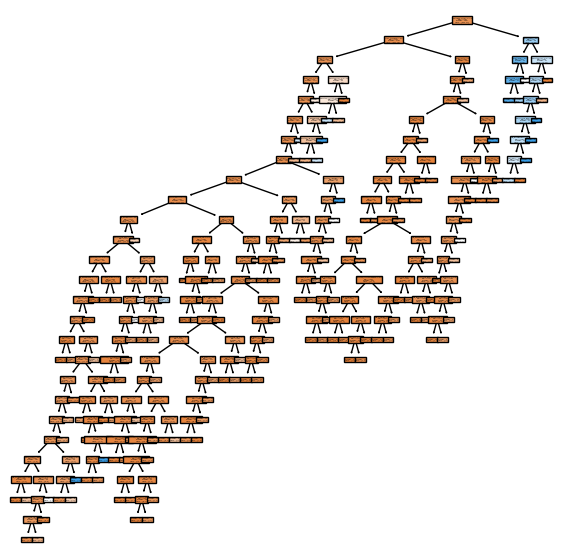

In [63]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_1,
                   feature_names=train_x.columns.to_list(),
                   filled=True)